# Section 5.4 — Bayesian linear models

This notebook contains the code examples from [Section 5.4 Bayesian linear models]() from the **No Bullshit Guide to Statistics**.

See also examples in:
- [BambiRegression.ipynb](./explorations/BambiRegression.ipynb).
- [chp_03.ipynb](./explorations/PyBayesianBookCode/notebooks_updated/chp_03.ipynb)
- [ESCS_multiple_regression.ipynb](./explorations/bambi/ESCS_multiple_regression.ipynb)

#### Notebook setup

In [1]:
# load Python modules
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Figures setup
plt.clf()  # needed otherwise `sns.set_theme` doesn"t work
from plot_helpers import RCPARAMS
RCPARAMS.update({"figure.figsize": (5, 3)})   # good for screen
# RCPARAMS.update({"figure.figsize": (5, 1.6)})  # good for print
sns.set_theme(
    context="paper",
    style="whitegrid",
    palette="colorblind",
    rc=RCPARAMS,
)

# High-resolution please
%config InlineBackend.figure_format = "retina"

# Where to store figures
DESTDIR = "figures/bayesian/lms"

<Figure size 640x480 with 0 Axes>

In [3]:
# set random seed for repeatability
np.random.seed(42)

## Simple linear regression using PyMC

In [4]:
import pymc as pm
import numpy as np
import arviz as az

# Simulated data
np.random.seed(42)
x = np.random.normal(0, 1, 100)
y = 3 + 2 * x + np.random.normal(0, 1, 100)

# Bayesian Linear Regression Model
with pm.Model() as model:
    # Priors
    beta0 = pm.Normal("beta0", mu=0, sigma=10)
    beta1 = pm.Normal("beta1", mu=0, sigma=10)
    sigma = pm.HalfNormal("sigma", sigma=1)
    
    # Likelihood
    mu = beta0 + beta1 * x
    y_obs = pm.Normal("y_obs", mu=mu, sigma=sigma, observed=y)
    
    # Sampling
    trace = pm.sample(2000, return_inferencedata=True)

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta0, beta1, sigma]
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 21 seconds.


### Summary using mean


In [5]:
# Posterior Summary
summary = az.summary(trace, kind="stats")
summary

,mean,sd,hdi_3%,hdi_97%
beta0,3.006,0.095,2.826,3.183
beta1,1.857,0.104,1.667,2.054
sigma,0.957,0.069,0.828,1.086


### Summary using median as focus statistic

ETI = Equal-Tailed Interval

In [6]:
az.summary(trace, stat_focus="median", kind="stats")

,median,mad,eti_3%,eti_97%
beta0,3.006,0.065,2.826,3.183
beta1,1.856,0.070,1.666,2.053
sigma,0.953,0.046,0.837,1.096


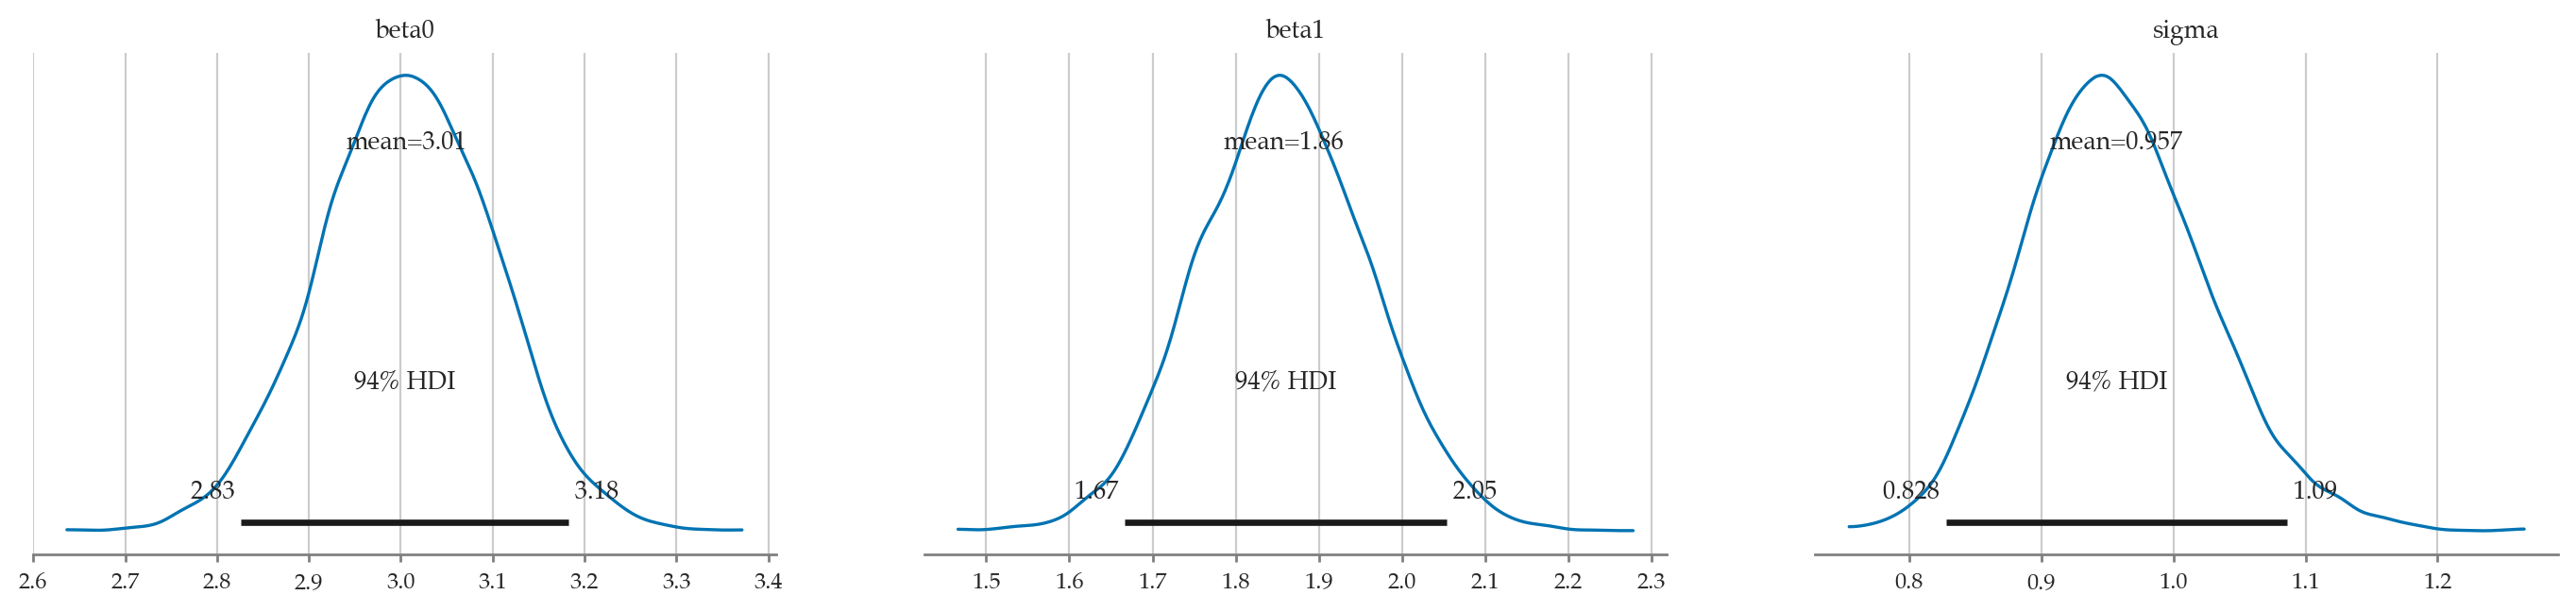

In [7]:
# Plotting posterior
az.plot_posterior(trace, point_estimate="mean", round_to=3);